In [1]:
import gcdyn.cycles
from gcdyn.cycles import (
    GC,
    cell_div_balanced_proliferator,
    simple_proliferator,
    uniform_mutator,
    binary_proliferator,
)
import gcdyn.replay as replay
from IPython.display import display
from Bio import SeqIO

In [2]:
fasta_path = "gcreplay_samples/five_seqs.fasta"
seqs = [
    str(seq_record.seq)
    for seq_record in SeqIO.parse(fasta_path, "fasta")
    if seq_record.id != "naive"
]

Trees with balanced proliferator, uniform mutator, replay selector

   delta_log10_KD  delta_expression
0        1.063396         -1.162056
    delta_log10_KD  delta_expression
0         1.063396         -1.162056
1         1.234569         -1.257275
2         1.234569         -1.257275
3         1.063396         -1.162056
4         1.234569         -1.257275
5         1.063396         -1.162056
6        -1.949523         -1.325336
7         1.063396         -1.162056
8         1.168475         -1.147066
9         1.120746         -1.123315
10        1.063396         -1.162056
11        1.063396         -1.162056
12        1.112913         -1.159690
13        1.063396         -1.162056
14        1.063396         -1.162056
15        1.063396         -1.162056
16        1.063396         -1.162056
17        1.112913         -1.159690
18        1.145023         -1.335491
19        1.145023         -1.335491
    delta_log10_KD  delta_expression
0        -1.136951         -1.432082
1         1.001945         -1.426974
2         1.063396         -1.162056
3  

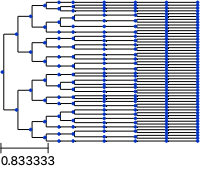

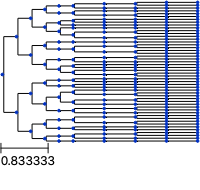

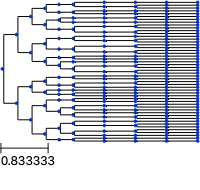

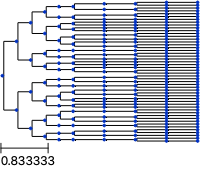

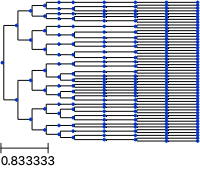

In [3]:
tree_renders = []
replay_cell_div_selector = gcdyn.cycles.ReplaySelector(slope=3.37, y_intercept=1)
for i in range(len(seqs)):
    seq = seqs[i]
    gc = GC(
        seq,
        cell_div_balanced_proliferator,
        uniform_mutator,
        replay_cell_div_selector,
        N0=1,
        Nmax=50,
    )
    gc.simulate(3, enforce_timescale=True)
    tree_renders.append(gc.tree.render("%%inline", w=200))

for render in tree_renders:
    display(render)

Trees with balanced proliferator, uniform mutator, uniform selector

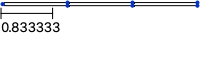

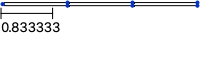

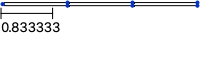

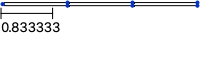

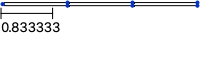

In [4]:
tree_renders = []
uniform_selector = gcdyn.cycles.UniformSelector()
for i in range(len(seqs)):
    seq = seqs[i]
    gc = GC(
        seq,
        cell_div_balanced_proliferator,
        uniform_mutator,
        uniform_selector,
        N0=1,
    )
    gc.simulate(3, enforce_timescale=True)
    tree_renders.append(gc.tree.render("%%inline", w=200))

for render in tree_renders:
    display(render)

Trees with simple proliferator, uniform proliferator, replay selector

   delta_log10_KD  delta_expression
0        1.063396         -1.162056
    delta_log10_KD  delta_expression
0         1.139650         -1.156990
1         1.681190         -1.025965
2         1.063396         -1.162056
3         1.681190         -1.025965
4         1.111774         -1.107368
5         1.681190         -1.025965
6         1.063396         -1.162056
7         1.063396         -1.162056
8         1.681190         -1.025965
9         1.063396         -1.162056
10        1.063396         -1.162056
11        1.063396         -1.162056
12        1.063396         -1.162056
13        1.681190         -1.025965
14        1.063396         -1.162056
15        1.063396         -1.162056
16        1.139650         -1.156990
17        1.681190         -1.025965
18        1.063396         -1.162056
19        1.139650         -1.156990
20        1.063396         -1.162056
21        1.681190         -1.025965
22        1.681190         -1.025965
23        1.063396         -1.162056
24 

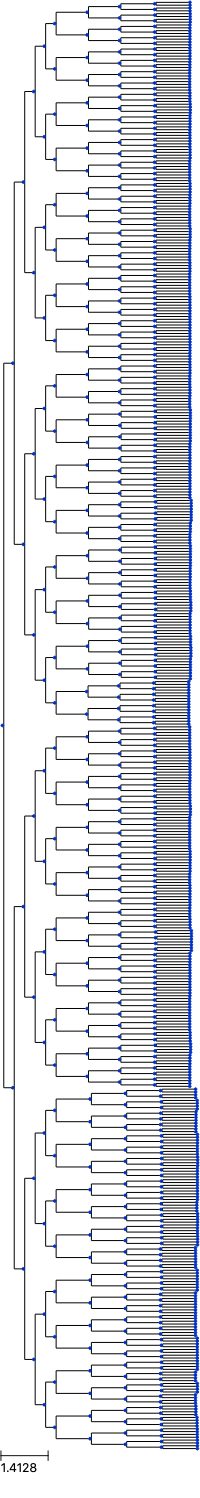

In [5]:
tree_renders = []
for i in range(1):
    seq = seqs[i]
    gc = GC(
        seq,
        simple_proliferator,
        uniform_mutator,
        replay_cell_div_selector,
        N0=1,
    )
    gc.simulate(3, enforce_timescale=False)
    tree_renders.append(gc.tree.render("%%inline", w=200))

for render in tree_renders:
    display(render)

Binary proliferator, uniform mutator, uniform selector

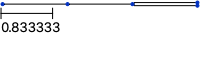

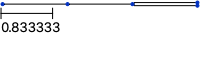

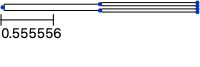

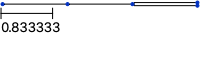

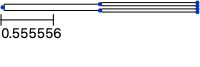

In [6]:
tree_renders = []
for i in range(len(seqs)):
    seq = seqs[i]
    gc = GC(
        seq,
        binary_proliferator,
        uniform_mutator,
        uniform_selector,
        N0=1,
    )
    gc.simulate(3, enforce_timescale=False)
    tree_renders.append(gc.tree.render("%%inline", w=200))

for render in tree_renders:
    display(render)

Look at phenotype trajectory for a simulation of a single cell in a GC

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import collections as mc
import seaborn as sns
from matplotlib.colors import SymLogNorm
from ete3 import faces, AttrFace, TreeStyle, NodeStyle, CircleFace


seq = "GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTCAGACTCTGTCCCTCACCTGTTCTGTCACTGGCGACTCCATCACCAGTGGTTACTGGAACTGGATCCGGAAATTCCCAGGGAATAAACTTGAGTACATGGGGTACATAAGCTACAGTGGTAGCACTTACTACAATCCATCTCTCAAAAGTCGAATCTCCATCACTCGAGACACATCCAAGAACCAGTACTACCTGCAGTTGAATTCTGTGACTACTGAGGACACAGCCACATATTACTGTGGAAGGGACTTCGATGTCTGGGGCGCAGGGACCACGGTCACCGTCTCCTCAGACATCGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAGGAGACAGGGTCAGCGTCACCTGCAAGGCCAGTCAGAATGTGGGTACTAATGTAGCCTGGTGTCAACAGAAACCAGGGCAATCTCCTAAAGCACTGATTTACTCGGCATCCTACAGGTACAGTGGAGTCCCTGATCGCTTCACAGGCAGTGGATCTGGGACAGATTTCACTCTCAGCATCAGCAATGTGCAGTCTGAAGACTTGGCAGAGTATTTCTGTCAGCAATATTACAGCTATCCTGTCACGTTCGGCTCGGGGACTAAGCTAGAAATAAAA"
gc = GC(
    seq,
    cell_div_balanced_proliferator,
    uniform_mutator,
    replay_cell_div_selector,
    N0=1,
    Nmax=35,
)
gc.simulate(3, enforce_timescale=True, prune=False)

   delta_log10_KD  delta_expression
0        1.322244         -0.619242
    delta_log10_KD  delta_expression
0         1.322244         -0.619242
1         1.322244         -0.619242
2         1.322244         -0.619242
3         1.322244         -0.619242
4         1.322244         -0.619242
5         1.322244         -0.619242
6         1.212501         -0.597289
7         1.322244         -0.619242
8         1.322244         -0.619242
9         1.322244         -0.619242
10        1.129209         -0.746662
11        1.129209         -0.746662
12        1.322244         -0.619242
13        1.322244         -0.619242
14        1.322244         -0.619242
15        1.495383         -0.809965
16        1.322244         -0.619242
17        1.397451         -0.787877
18        1.322244         -0.619242
19        1.322244         -0.619242
    delta_log10_KD  delta_expression
0         1.322244         -0.619242
1         1.500092         -1.170046
2         0.682810         -0.739552
3  

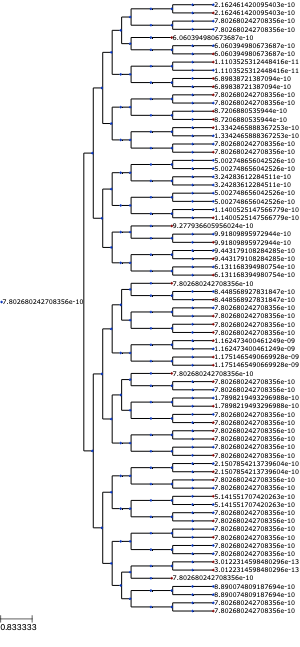

In [8]:
def layout_KD(node):
    if node.is_leaf() or node.is_root():
        faces.add_face_to_node(AttrFace("KD"), node, column=0)
    if node.terminated:
        node.set_style(terminated_style)


terminated_style = NodeStyle()
terminated_style["fgcolor"] = "DarkRed"
ts = TreeStyle()
ts.layout_fn = layout_KD
gc.tree.render("%%inline", w=300, tree_style=ts)

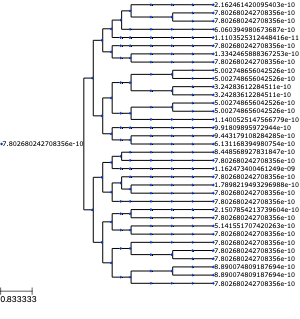

In [9]:
gc.prune()
gc.tree.render("%%inline", w=300, tree_style=ts)

Plotting trajectory of simulated phenotypes in one simulation with three cycles:

/var/folders/qy/y63rpqnw8xn4r6006s6mz6p00000gp/T/ipykernel_99022/2975256716.py:7: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  norm = SymLogNorm(linthresh=1, vmin=0, vmax=10)


Text(0.5, 0, 'distance from starting sequence')

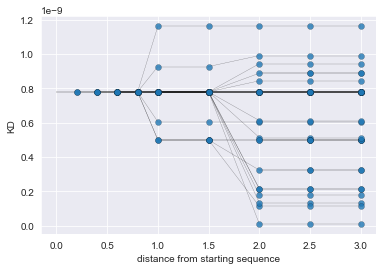

In [10]:
# Adapted from phenotype-trajectories notebook (https://github.com/matsengrp/gcreplay/blob/main/analysis/phenotype-trajectories.ipynb)

points = []
lines = []
colors = []
sim_df = pd.DataFrame()
norm = SymLogNorm(linthresh=1, vmin=0, vmax=10)
cmap = "viridis"

fig, axes = plt.subplots()

alive_descendants = set(
    node for node in gc.tree.get_descendants() if not node.terminated
)

all_descendants = set(node for node in gc.tree.get_descendants())

for node in alive_descendants:
    node_phenotype = getattr(node, "KD")
    points.append((gc.tree.get_distance(node), node_phenotype))
    if node.up is not None:
        parent_phenotype = getattr(node.up, "KD")
        lines.append(
            [
                (gc.tree.get_distance(node.up), parent_phenotype),
                (gc.tree.get_distance(node), node_phenotype),
            ]
        )
lc = mc.LineCollection(lines, colors="k", linewidths=0.3, alpha=0.5, zorder=3)
axes.add_collection(lc)
axes.scatter(
    *zip(*points),
    cmap=cmap,
    alpha=0.8,
    edgecolors="k",
    linewidths=0.2,
    zorder=4,
    norm=norm
)
axes.set_ylabel("KD")
axes.set_xlabel("distance from starting sequence")

Text(0.5, 0, 'distance from original sequence')

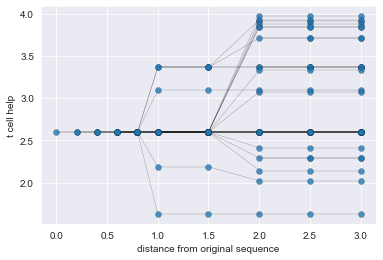

In [11]:
fig, axes = plt.subplots()
points = []
lines = []
for node in gc.tree.traverse():
    node_phenotype = getattr(node, "fitness")
    points.append((gc.tree.get_distance(node), node_phenotype))
    if node.up is not None:
        parent_phenotype = getattr(node.up, "fitness")
        lines.append(
            [
                (gc.tree.get_distance(node.up), parent_phenotype),
                (gc.tree.get_distance(node), node_phenotype),
            ]
        )
lc = mc.LineCollection(lines, colors="k", linewidths=0.3, alpha=0.5, zorder=3)
axes.add_collection(lc)
axes.scatter(
    *zip(*points), cmap=cmap, alpha=0.8, edgecolors="k", linewidths=0.2, zorder=4
)


axes.set_ylabel("t cell help")
axes.set_xlabel("distance from original sequence")